In [1]:
import os
import sys
import numpy as np
import random
import matplotlib.pyplot as plt

os.chdir('/home/rfpred')
sys.path.append('/home/rfpred')
sys.path.append('/home/rfpred/envs/rfenv/lib/python3.11/site-packages/')
sys.path.append('/home/rfpred/envs/rfenv/lib/python3.11/site-packages/nsdcode')

print(sys.path)
%pwd

['/home/rfpred/notebooks', '/home/rfpred/envs/rfenv/lib/python311.zip', '/home/rfpred/envs/rfenv/lib/python3.11', '/home/rfpred/envs/rfenv/lib/python3.11/lib-dynload', '', '/home/rfpred/envs/rfenv/lib/python3.11/site-packages', '/home/rfpred', '/home/rfpred/envs/rfenv/lib/python3.11/site-packages/', '/home/rfpred/envs/rfenv/lib/python3.11/site-packages/nsdcode']


'/home/rfpred'

In [2]:
# import numpy as np
print(np.__file__)


/home/rfpred/envs/rfenv/lib/python3.11/site-packages/numpy/__init__.py


In [3]:
sys.executable


'/home/rfpred/envs/rfenv/bin/python3.11'

In [4]:
# import all the functions within imgproc.py


from funcs.rf_tools import (get_dat, calculate_sigma, calculate_pRF_location, prf_plots_new, prf_plots, make_visrois_dict, 
                            make_gaussian_2d, make_circle_mask, css_gaussian_cut, roi_filter, write_prf_dict, 
                            get_mask, compare_masks, compare_heatmaps, prf_heatmap, rsquare_selection, nsd_R2_dict)
from funcs.utility import print_dict_structure, print_large
from funcs.imgproc import show_stim, get_img_prf

In [5]:
# !pip list
# !conda list

In [6]:
n_subjects = len(os.listdir('/home/rfpred/data/natural-scenes-dataset/nsddata/ppdata'))

In [7]:
vismask_dict = make_visrois_dict(vox_count = 'y', bin_check = 'n', n_subjects=n_subjects)

Subject 1


V1_mask
Non-zero voxels in V1_mask: 7887
V2_mask
Non-zero voxels in V2_mask: 8296
V3_mask
Non-zero voxels in V3_mask: 7022
V4_mask
Non-zero voxels in V4_mask: 3976
Subject 2
V1_mask
Non-zero voxels in V1_mask: 6476
V2_mask
Non-zero voxels in V2_mask: 6376
V3_mask
Non-zero voxels in V3_mask: 6236
V4_mask
Non-zero voxels in V4_mask: 2887
Subject 3
V1_mask
Non-zero voxels in V1_mask: 7358
V2_mask
Non-zero voxels in V2_mask: 6721
V3_mask
Non-zero voxels in V3_mask: 5316
V4_mask
Non-zero voxels in V4_mask: 2486
Subject 4
V1_mask
Non-zero voxels in V1_mask: 5119
V2_mask
Non-zero voxels in V2_mask: 5088
V3_mask
Non-zero voxels in V3_mask: 4669
V4_mask
Non-zero voxels in V4_mask: 2790
Subject 5
V1_mask
Non-zero voxels in V1_mask: 6502
V2_mask
Non-zero voxels in V2_mask: 6309
V3_mask
Non-zero voxels in V3_mask: 5383
V4_mask
Non-zero voxels in V4_mask: 3184
Subject 6
V1_mask
Non-zero voxels in V1_mask: 6479
V2_mask
Non-zero voxels in V2_mask: 6905
V3_mask
Non-zero voxels in V3_mask: 7130
V4_mask

In [8]:
prf_dict = write_prf_dict(binary_masks = vismask_dict)
# print_dict_structure(prf_dict)

In [9]:
R2_dict = nsd_R2_dict(vismask_dict)

Create dictionary for top n R2 explained variance voxels, both for the prf and nsd stimuli separately.

In [10]:
prf_rsq_dict = rsquare_selection(prf_dict, 1000, n_subjects = n_subjects, dataset = 'prf')
nsd_rsq_dict = rsquare_selection(R2_dict, 1000, n_subjects = n_subjects, dataset = 'nsd')

# print_dict_structure(rsq_dict)

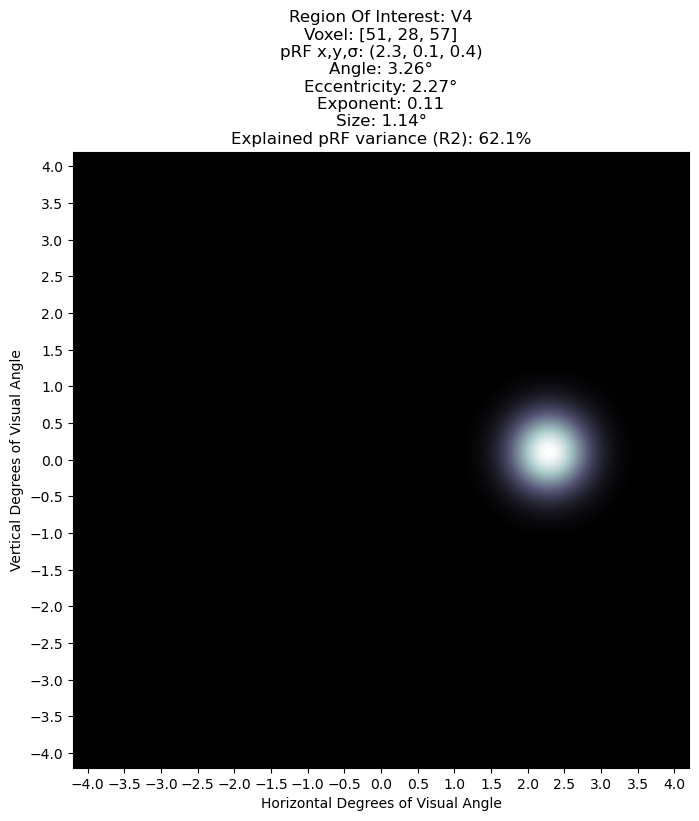

In [11]:
prf_info = get_mask(dim = 425, subject = 'subj01', binary_masks = vismask_dict, 
                                        prf_proc_dict = prf_dict, type='gaussian', roi='V4',
                                        plot = 'y', excl_reason = 'n', sigma_min=.1, sigma_max = 4.2)


mask
x
y
pix_radius
deg_radius
iterations
x_vox
y_vox
z_vox
x_deg
y_deg
angle
eccentricity
exponent
size
R2


0.81955

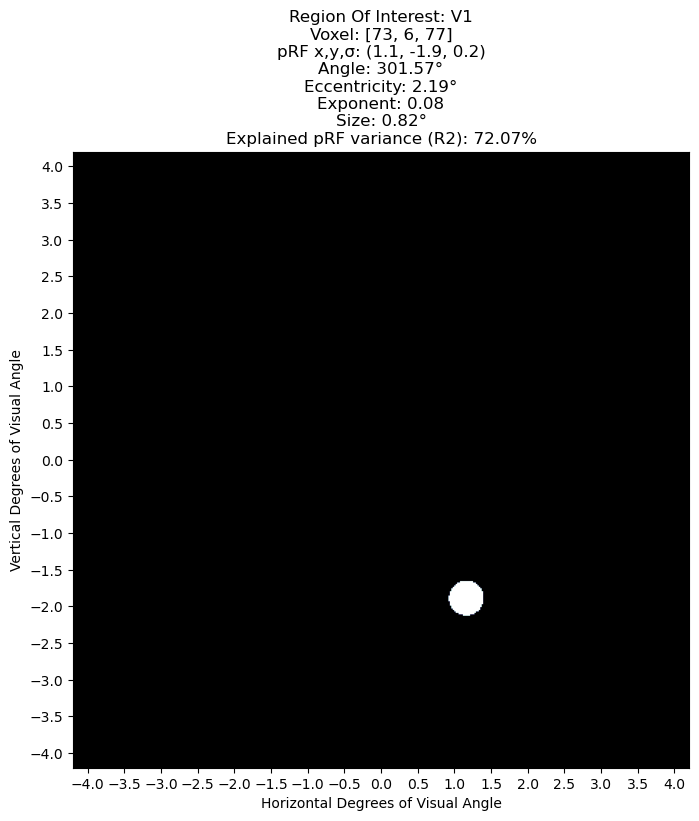

In [12]:
stront = get_mask(dim=425, subject='subj01', binary_masks = vismask_dict, 
                prf_proc_dict=prf_dict, type='circle', roi='V1',
                plot='y', excl_reason='n', sigma_min=.1, sigma_max=4.2, rand_seed=None)

print_dict_structure(stront)

stront['size']

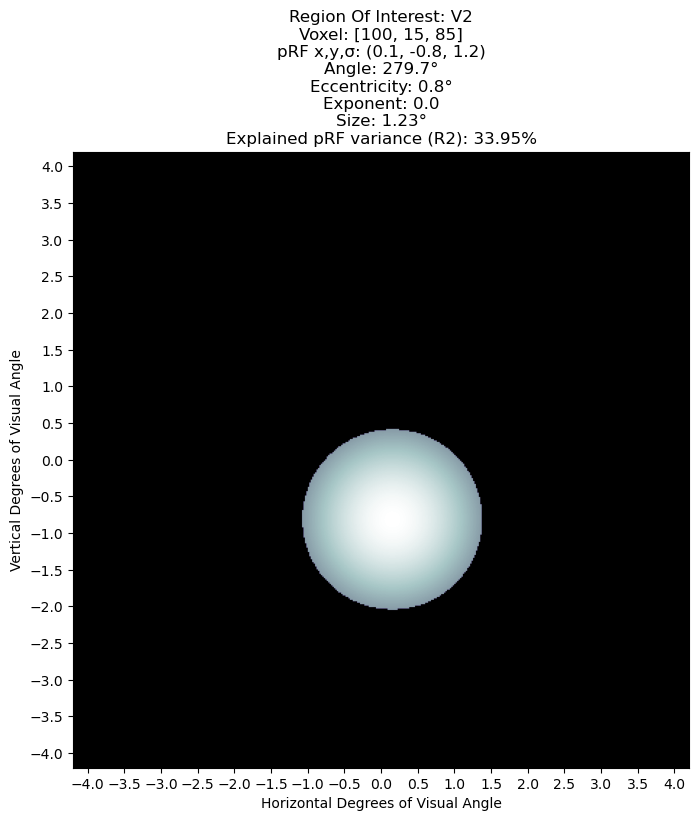

In [13]:
_ = get_mask(dim = 425, subject = 'subj01', binary_masks = vismask_dict, 
                                        prf_proc_dict = prf_dict, type='cut_gaussian', roi='V2',
                                        plot = 'y', excl_reason = 'n', sigma_min=1, sigma_max = 4.2, rand_seed=11)


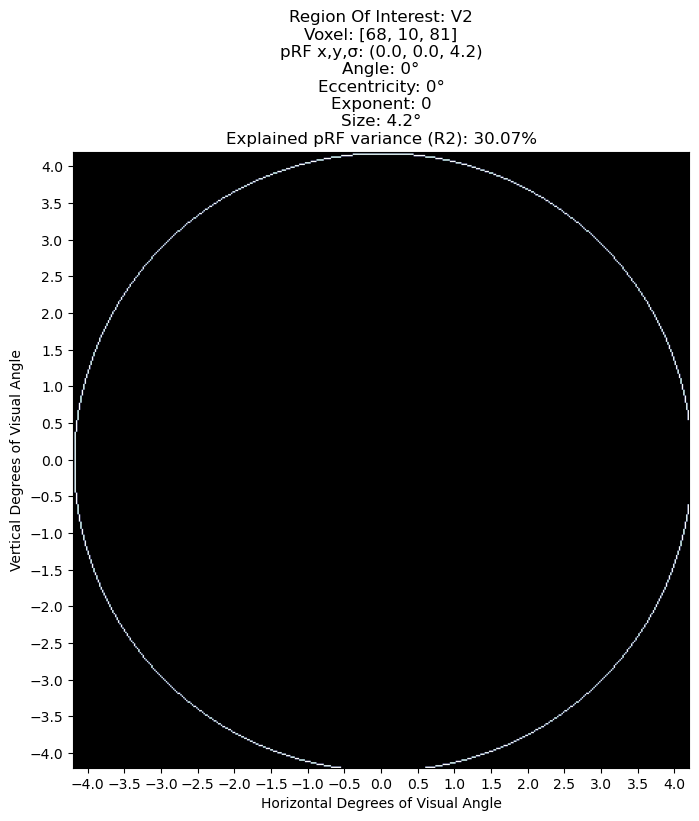

In [14]:
_ = get_mask(dim = 425, subject = 'subj01', binary_masks = vismask_dict, 
                                        prf_proc_dict = prf_dict, type='outline', roi='V2',
                                        plot = 'y', excl_reason = 'n', sigma_min=1, sigma_max = 4.2)


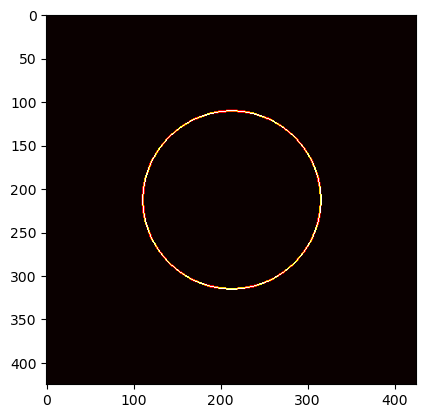

In [15]:
import matplotlib.pyplot as plt

# This is the circle that corresponds to the middle 4 degs
zirkel = make_circle_mask(425, 213, 213, 2 * 425/8.4, fill='n', margin_width = 2)

plt.imshow(zirkel, cmap = 'hot')
plt.show()
# with np.printoptions(threshold=np.inf):
#     print(zirkel)v

mask
x
y
pix_radius
deg_radius
iterations
x_vox
y_vox
z_vox
x_deg
y_deg
angle
eccentricity
exponent
size
R2

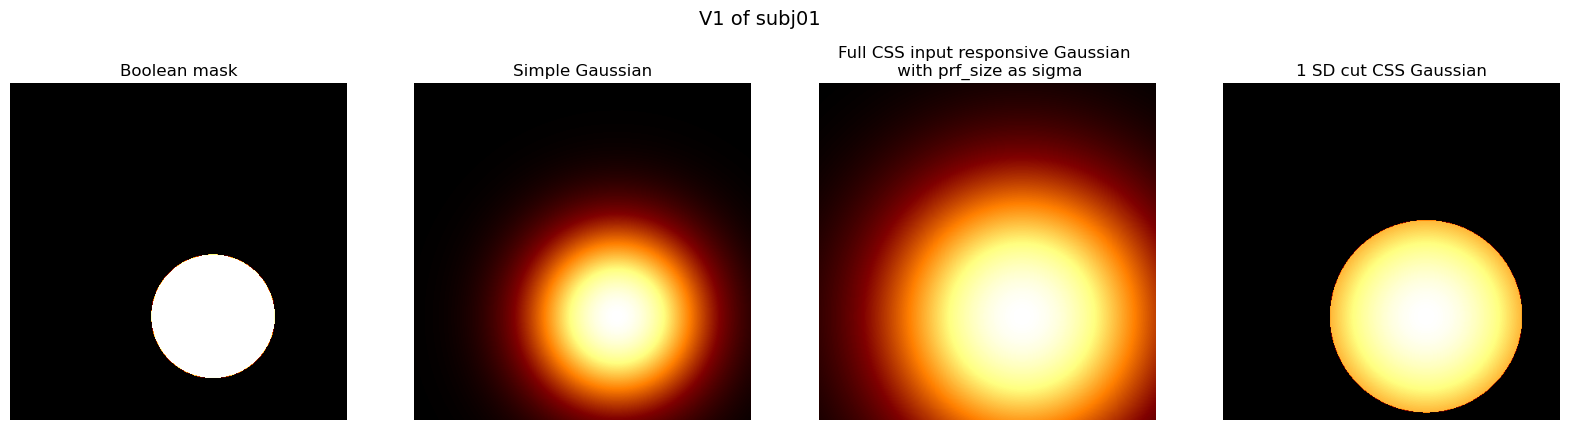

In [16]:
compare_masks(mask_dict =  vismask_dict, prf_dict = prf_dict)

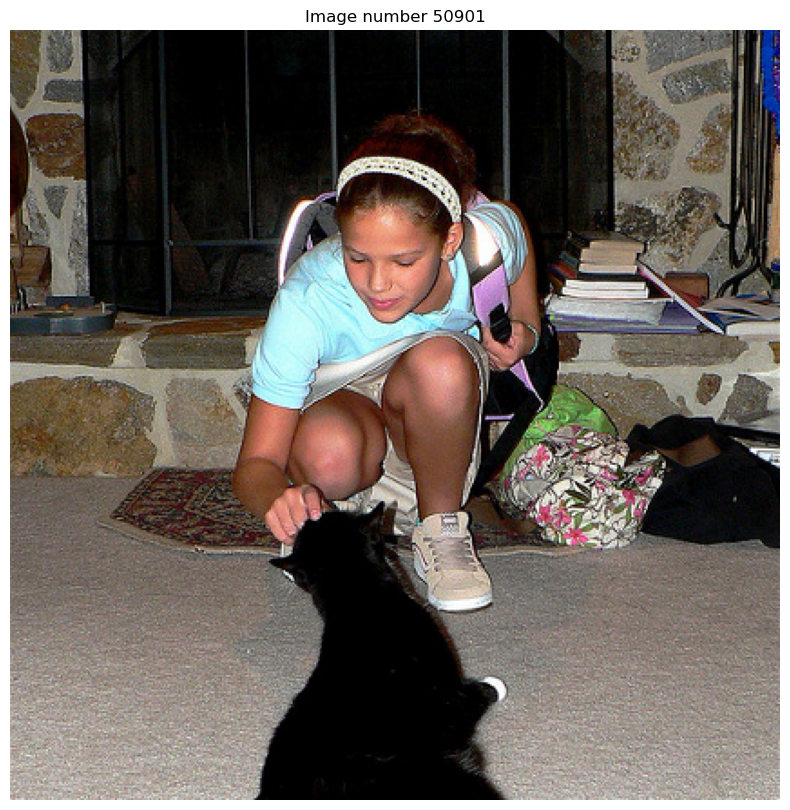

In [17]:
# stim_img, img_no = show_stim(img_no = 209)
stim_img, img_no = show_stim()

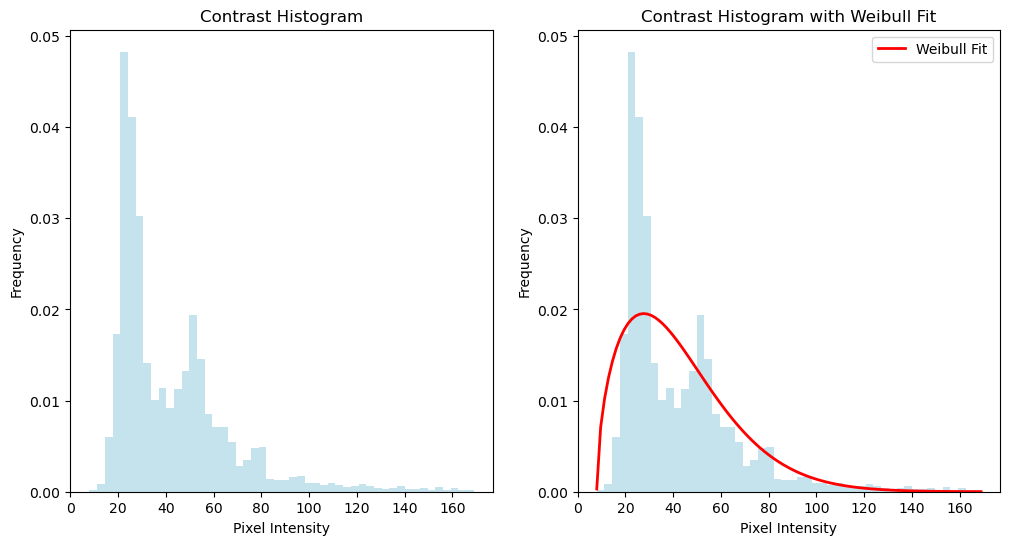

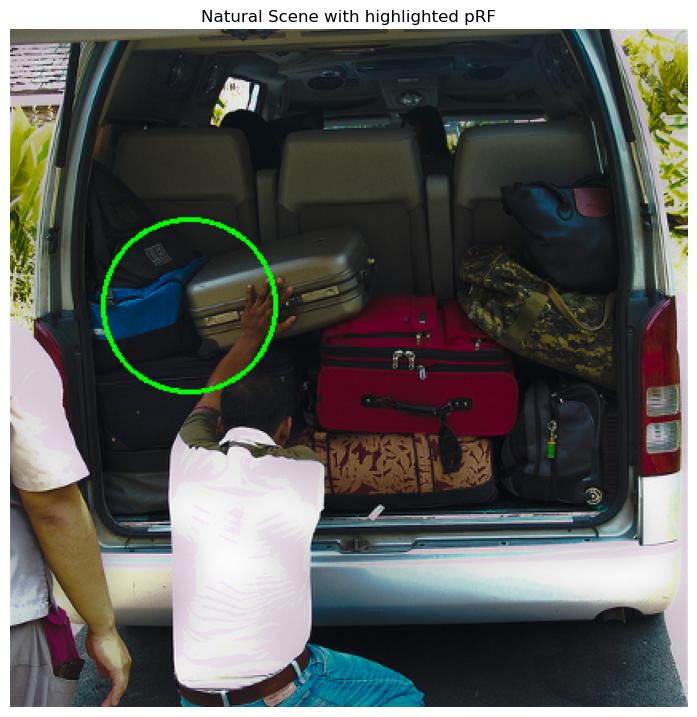

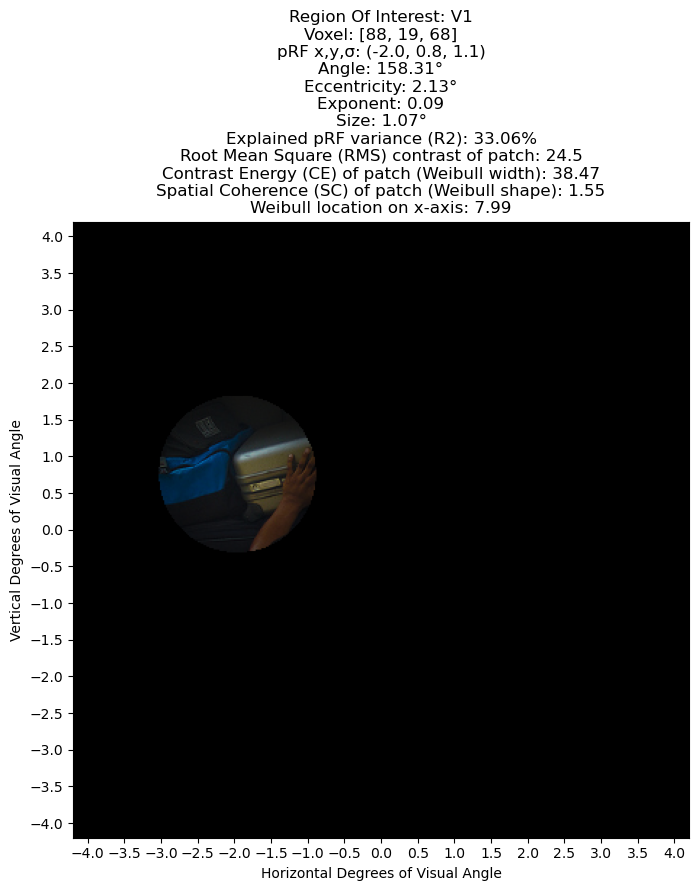

In [20]:
prf_details = get_img_prf(show_stim(hide='y')[0], type='cut_gaussian', binary_masks = vismask_dict, 
            prf_proc_dict = prf_dict, roi = 'V1', sigma_min = 1.0, 
            sigma_max = 2, rand_seed=None, invert='n', central = 'n', grid = 'n')


# print(prf_details['size'])

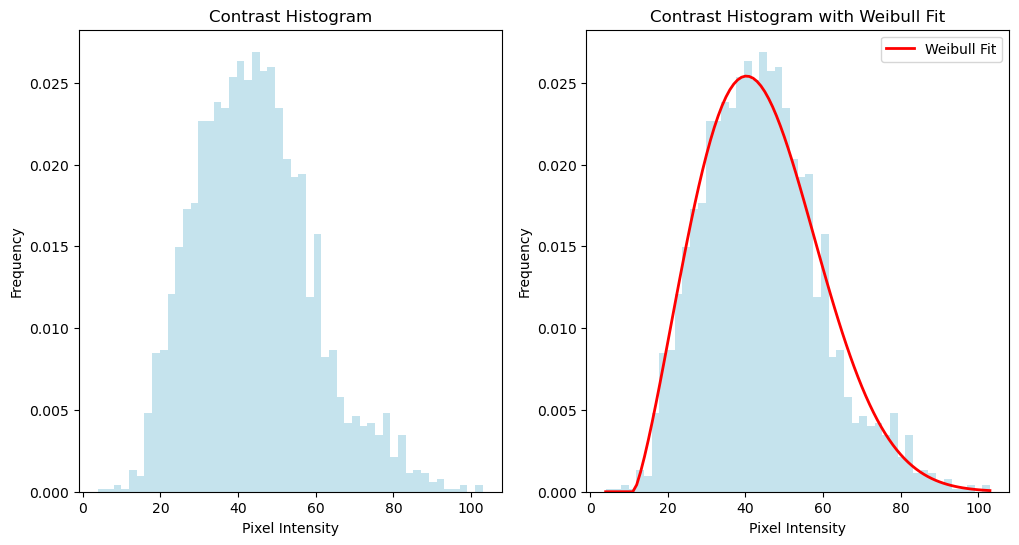

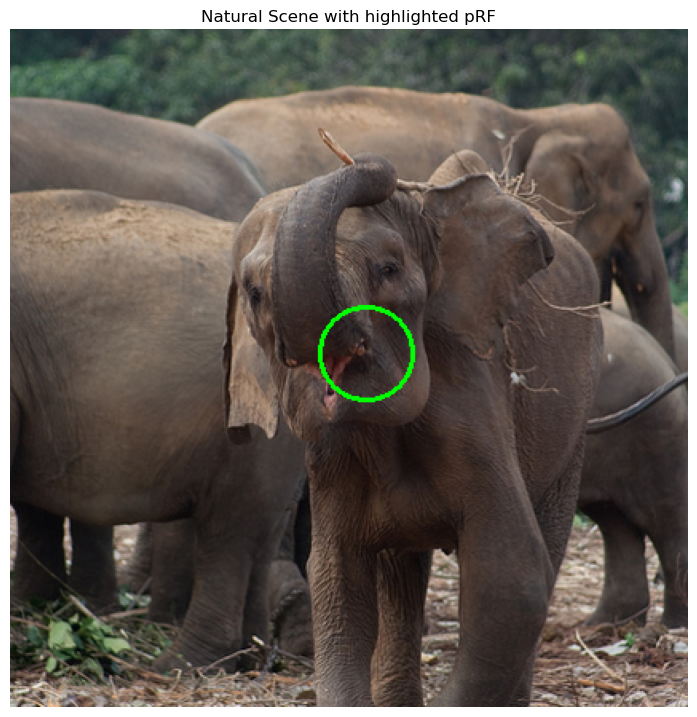

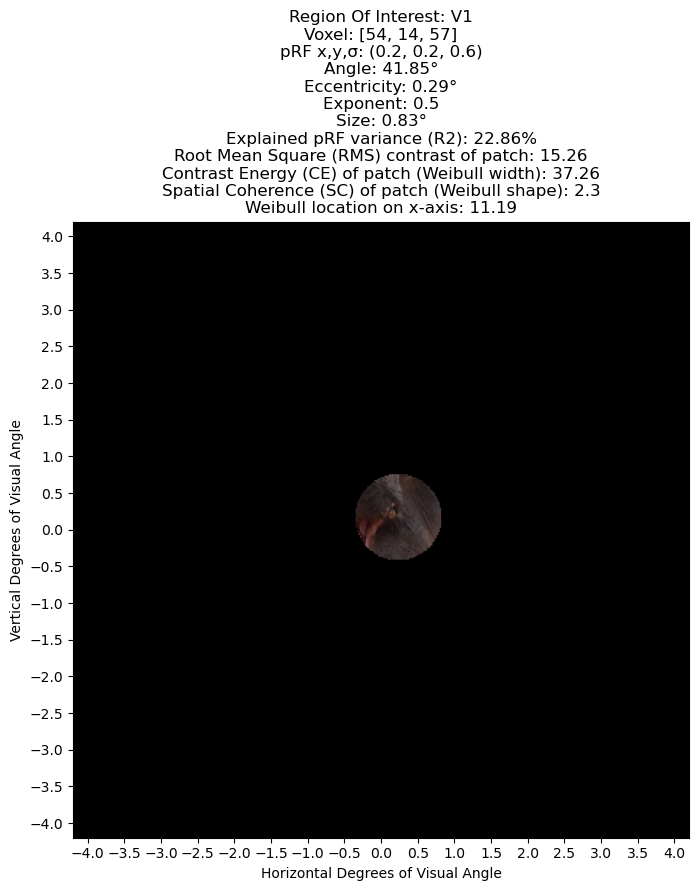

In [49]:


a = get_img_prf(show_stim(hide='y')[0], type='circle', binary_masks = vismask_dict, 
            prf_proc_dict = prf_dict, roi = 'V1', sigma_min = .1, 
            sigma_max = 2, ecc_max = 1, central='n', invert='n')


# natural-scenes-dataset/nsddata_timeseries/ppdata/subj01/func1mm/design

Okao nice this works, but I need to do this for every subj and every roi separately, so best to do it inside the heatmap function, as this one maps over that anyway, or well, it doesn't yet over the rois, but I can probably add that.

In [35]:


nsd_rsq_full = nsd_R2_dict(vismask_dict)




48.11262


Subject: subj01, Voxel 1 out of 10 found
Subject: subj01, Voxel 2 out of 10 found
Subject: subj01, Voxel 3 out of 10 found
Subject: subj01, Voxel 4 out of 10 found
Subject: subj01, Voxel 5 out of 10 found
Subject: subj01, Voxel 6 out of 10 found
Subject: subj01, Voxel 7 out of 10 found
Subject: subj01, Voxel 8 out of 10 found
Subject: subj01, Voxel 9 out of 10 found
Subject: subj01, Voxel 10 out of 10 found


Subject: subj02, Voxel 1 out of 10 found
Subject: subj02, Voxel 2 out of 10 found
Subject: subj02, Voxel 3 out of 10 found
Subject: subj02, Voxel 4 out of 10 found
Subject: subj02, Voxel 5 out of 10 found
Subject: subj02, Voxel 6 out of 10 found
Subject: subj02, Voxel 7 out of 10 found
Subject: subj02, Voxel 8 out of 10 found
Subject: subj02, Voxel 9 out of 10 found
Subject: subj02, Voxel 10 out of 10 found


Subject: subj03, Voxel 1 out of 10 found
Subject: subj03, Voxel 2 out of 10 found
Subject: subj03, Voxel 3 out of 10 found
Subject: subj03, Voxel 4 out of 10 found
Subject: s

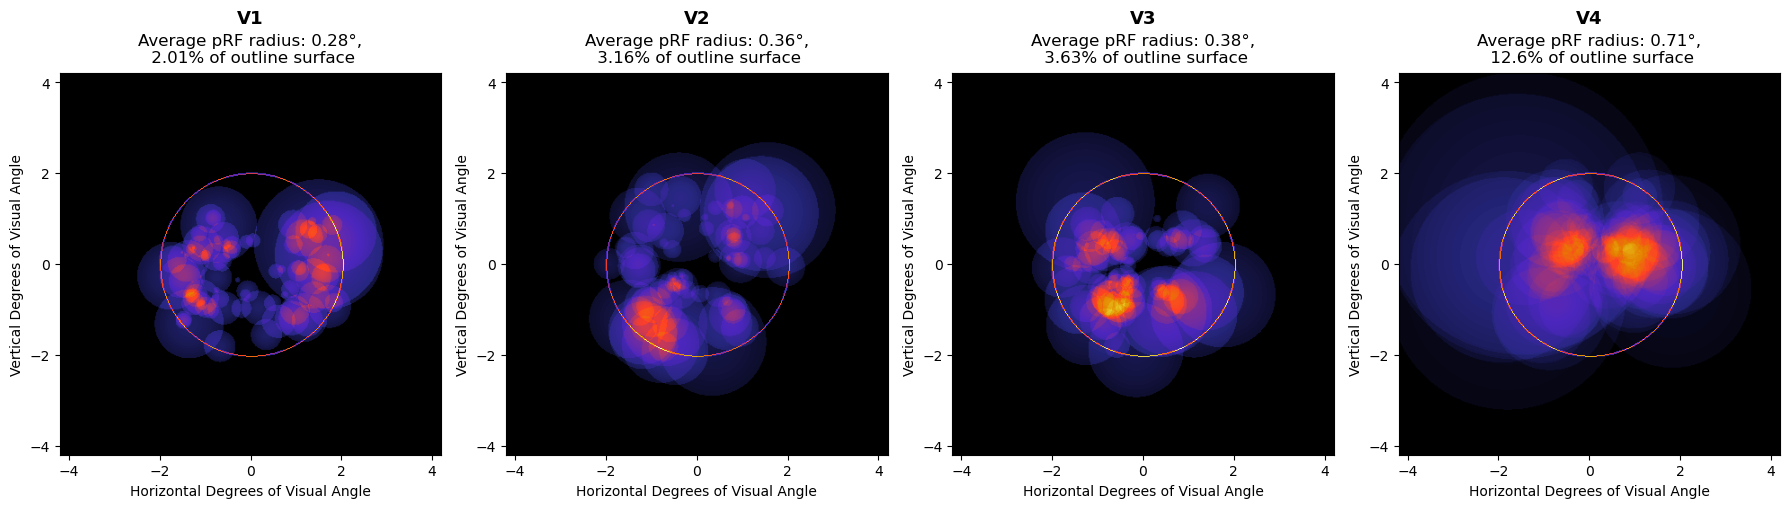

In [18]:
compare_heatmaps(n_prfs = 10, binary_masks = vismask_dict, prf_proc_dict = prf_dict,
                 mask_type = 'cut_gaussian', cmap = 'CMRmap',
                 sigma_min = 0, sigma_max = 4.2, ecc_max = 2, outline_degs = 2, 
                 filter_dict = nsd_rsq_dict, excl_reason = 'n', print_prog = 'y')

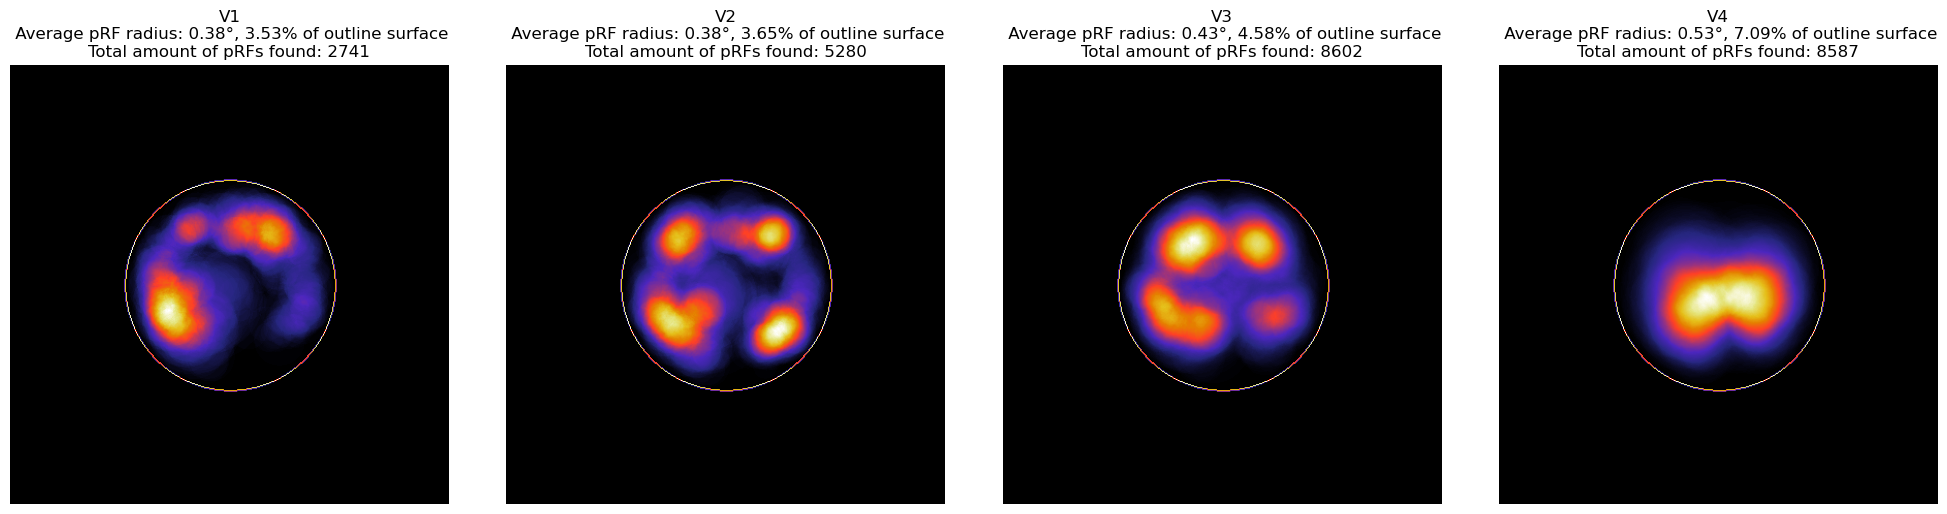

In [35]:
compare_heatmaps('all', binary_masks = vismask_dict, prf_proc_dict = prf_dict,
                 mask_type = 'cut_gaussian', cmap = 'CMRmap',
                 sigma_min = 0.1, sigma_max = 4.2, ecc_max = 2, outline_degs = 2, 
                 filter_dict = nsd_rsq_dict, excl_reason = 'n', print_prog = 'n', ecc_strict = 'y')

What you see is that including a filter dict makes the code run a lot faster, which makes sense as you use only 1000 voxels instead of +-7500

Subject: subj01, Voxel 1 out of 1000 found
Subject: subj01, Voxel 2 out of 1000 found
Subject: subj01, Voxel 3 out of 1000 found
Subject: subj01, Voxel 4 out of 1000 found
Subject: subj01, Voxel 5 out of 1000 found
Subject: subj01, Voxel 6 out of 1000 found
Subject: subj01, Voxel 7 out of 1000 found
Subject: subj01, Voxel 8 out of 1000 found
Subject: subj01, Voxel 9 out of 1000 found
Subject: subj01, Voxel 10 out of 1000 found
Subject: subj01, Voxel 11 out of 1000 found
Subject: subj01, Voxel 12 out of 1000 found
Subject: subj01, Voxel 13 out of 1000 found
Subject: subj01, Voxel 14 out of 1000 found
Subject: subj01, Voxel 15 out of 1000 found
Subject: subj01, Voxel 16 out of 1000 found
Subject: subj01, Voxel 17 out of 1000 found
Subject: subj01, Voxel 18 out of 1000 found
Subject: subj01, Voxel 19 out of 1000 found
Subject: subj01, Voxel 20 out of 1000 found
Subject: subj01, Voxel 21 out of 1000 found
Subject: subj01, Voxel 22 out of 1000 found
Subject: subj01, Voxel 23 out of 1000 fou

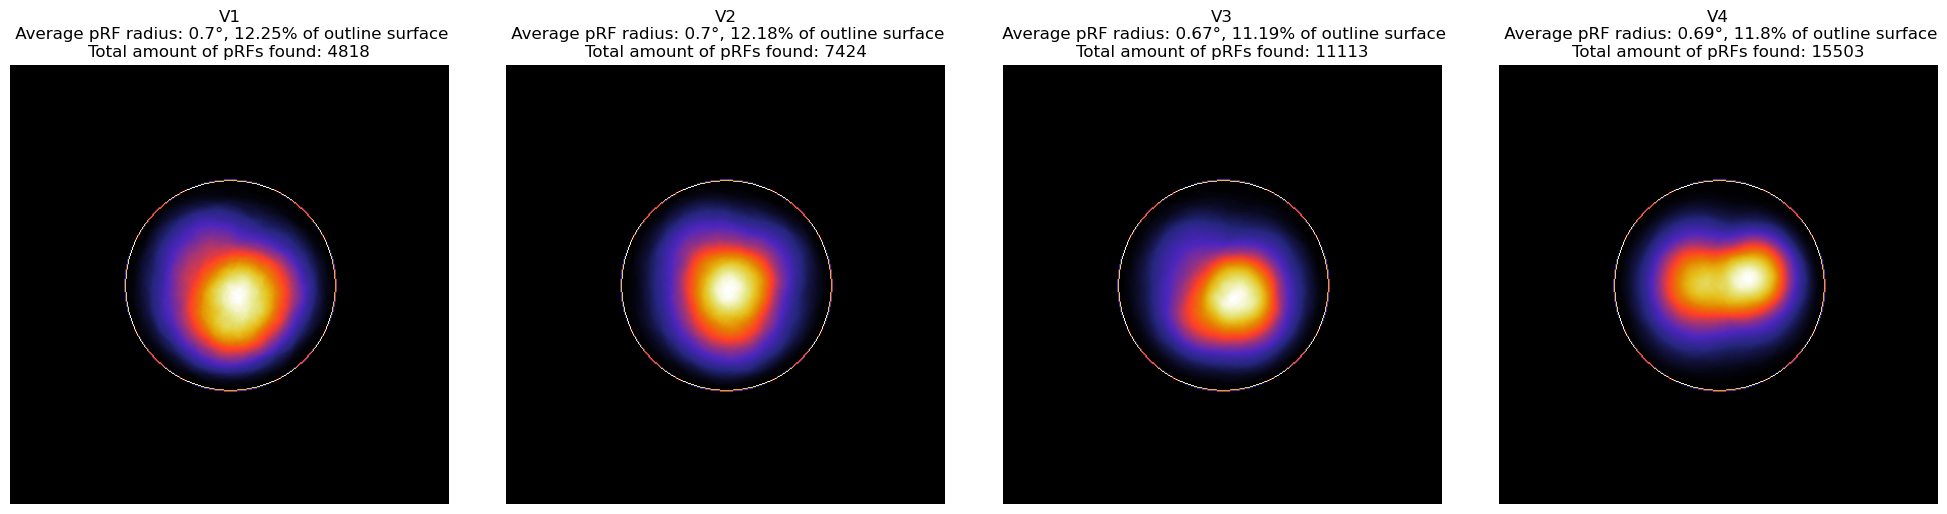

In [26]:
compare_heatmaps(1000, binary_masks = vismask_dict, prf_proc_dict = prf_dict,
                 mask_type = 'cut_gaussian', cmap = 'CMRmap',
                 sigma_min = .5, sigma_max = 4.2, ecc_max = 2, outline_degs = 2, 
                 filter_dict = None, excl_reason = 'n', print_prog = 'y', ecc_strict = 'y')

In [42]:

def compare_heatmaps(n_prfs, binary_masks=None, prf_proc_dict=None, filter_dict=None, basis='roi',
                     mask_type='cut_gaussian', cmap='CMRmap', roi='V1', excl_reason='n', sigma_min=0,
                     sigma_max=4.2, ecc_max=2, print_prog='n', outline_degs=None, fill_outline='n', ecc_strict=None, grid='n'):
    if basis == 'roi':
        rois = sorted(prf_proc_dict['subj01']['proc'].keys())

    def plot_mask(ax, mask, title, subtitle='aars', last=None, extent=[-4.2, 4.2, -4.2, 4.2]):
        img = ax.imshow(mask, cmap=cmap, extent=extent)
        ax.set_title(title, fontsize = 13, weight = 'semibold')
        
        if subtitle:
            ax.text(0.5, 1.02, subtitle, transform=ax.transAxes,
                    ha='center', va='bottom', fontsize=12)  # Adjust fontsize as needed
        
        ax.set_xlabel('Horizontal Degrees of Visual Angle')
        ax.set_ylabel('Vertical Degrees of Visual Angle')
        ax.xaxis.set_major_locator(MultipleLocator(2))
        ax.yaxis.set_major_locator(MultipleLocator(2))

    fig, axs = plt.subplots(2, 2, figsize=(11, 11))

    for n, roi in enumerate(rois):
        heatmap, iter, end_premat, roi, prf_sizes, rel_surf, total_prfs_found = prf_heatmap(
                                    n_prfs, binary_masks=binary_masks, prf_proc_dict=prf_proc_dict,
                                    mask_type=mask_type, cmap=cmap, roi=roi[:2], excl_reason=excl_reason,
                                    sigma_min=sigma_min, sigma_max=sigma_max, ecc_max=ecc_max,
                                    print_prog=print_prog, subjects='all', outline_degs=outline_degs,
                                    filter_dict=filter_dict, fill_outline=fill_outline, plot_heat='n',
                                    ecc_strict=ecc_strict, grid=grid)

        last_plot = 'y' if n == (len(rois) - 1) else 'n'
        plot_mask(axs[n//2, n%2], heatmap, f'{roi}\n\n', f'Average pRF radius: {round(np.mean(prf_sizes), 2)}°,\n {rel_surf}% of outline surface', last=last_plot)
    plt.tight_layout()
    plt.show()


Subject: subj02, Voxel 1 out of 6476 found
Subject: subj02, Voxel 2 out of 6476 found
Subject: subj02, Voxel 3 out of 6476 found
Subject: subj02, Voxel 4 out of 6476 found
Subject: subj02, Voxel 5 out of 6476 found
Subject: subj02, Voxel 6 out of 6476 found
Subject: subj02, Voxel 7 out of 6476 found
Subject: subj02, Voxel 8 out of 6476 found
Subject: subj02, Voxel 9 out of 6476 found
Subject: subj02, Voxel 10 out of 6476 found
Subject: subj02, Voxel 11 out of 6476 found
Subject: subj02, Voxel 12 out of 6476 found
Subject: subj02, Voxel 13 out of 6476 found
Subject: subj02, Voxel 14 out of 6476 found
Subject: subj02, Voxel 15 out of 6476 found
Subject: subj03, Voxel 1 out of 7358 found
Subject: subj03, Voxel 2 out of 7358 found
Subject: subj03, Voxel 3 out of 7358 found
Subject: subj03, Voxel 4 out of 7358 found
Subject: subj03, Voxel 5 out of 7358 found
Subject: subj03, Voxel 6 out of 7358 found
Subject: subj03, Voxel 7 out of 7358 found
Subject: subj03, Voxel 8 out of 7358 found
Subje

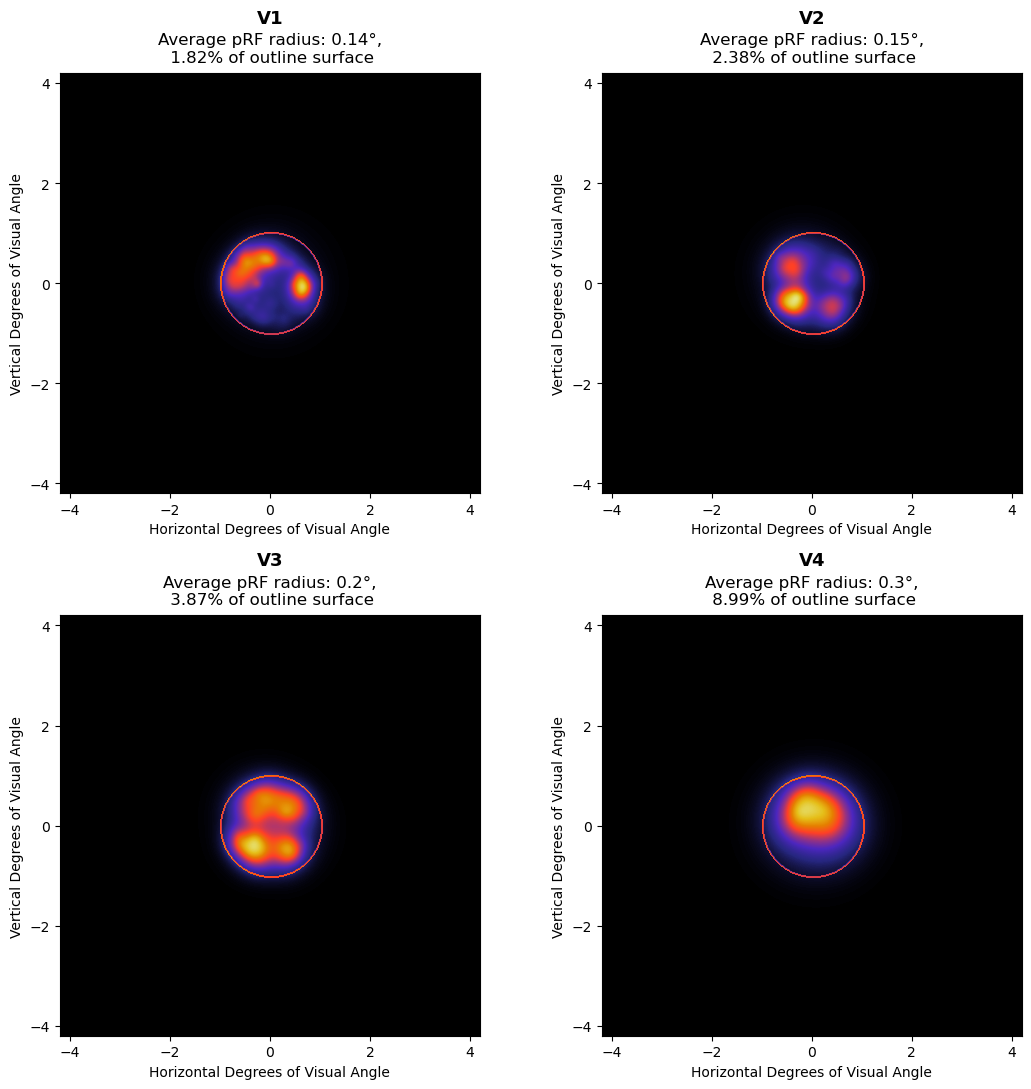

In [45]:
compare_heatmaps('all', binary_masks = vismask_dict, prf_proc_dict = prf_dict,
                 mask_type = 'full_gaussian', cmap = 'CMRmap',
                 sigma_min = 0.05, sigma_max = 2, ecc_max = 1, outline_degs = 1, 
                 filter_dict = nsd_rsq_dict, excl_reason = 'n', print_prog = 'y', ecc_strict = 'y')

In [20]:
kak = prf_plots_new(1, bottom_percent=10)

NameError: name 'prf_dict' is not defined

Subject: subj01, Voxel 1 out of 3976 found
Subject: subj01, Voxel 2 out of 3976 found
Subject: subj01, Voxel 3 out of 3976 found
Subject: subj01, Voxel 4 out of 3976 found
Subject: subj01, Voxel 5 out of 3976 found
Subject: subj01, Voxel 6 out of 3976 found
Subject: subj01, Voxel 7 out of 3976 found
Subject: subj01, Voxel 8 out of 3976 found
Subject: subj01, Voxel 9 out of 3976 found
Subject: subj01, Voxel 10 out of 3976 found
Subject: subj01, Voxel 11 out of 3976 found
Subject: subj01, Voxel 12 out of 3976 found
Subject: subj01, Voxel 13 out of 3976 found
Subject: subj01, Voxel 14 out of 3976 found
Subject: subj01, Voxel 15 out of 3976 found
Subject: subj01, Voxel 16 out of 3976 found
Subject: subj01, Voxel 17 out of 3976 found
Subject: subj01, Voxel 18 out of 3976 found
Subject: subj01, Voxel 19 out of 3976 found
Subject: subj01, Voxel 20 out of 3976 found
Subject: subj01, Voxel 21 out of 3976 found
Subject: subj01, Voxel 22 out of 3976 found
Subject: subj01, Voxel 23 out of 3976 fou

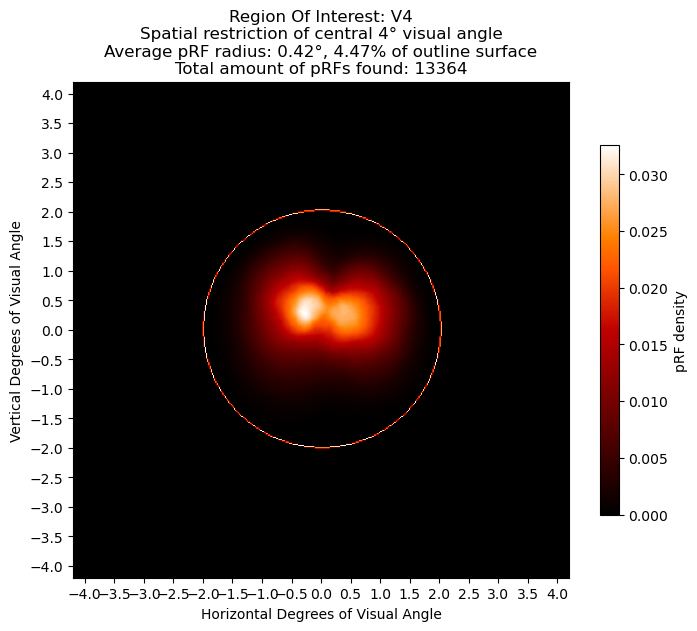

Runtime: 73.109 seconds
There were 997 out of 3976 pRFs considered


In [192]:
# Working heatmap call script.
import random
import time

start = time.time()

heatmap, iter, end_premat, roi, prf_sizes, avg_surf, total_prfs = prf_heatmap('all', binary_masks=vismask_dict, prf_proc_dict=prf_dict,
                                                        mask_type='cut_gaussian', cmap='gist_heat', print_prog='y', 
                                                        roi='V4', sigma_min=0, sigma_max = 4.2, ecc_max = 2, subjects='all', 
                                                        outline_degs = 2, 
                                                        filter_dict = nsd_rsq_dict, ecc_strict = 'y')

end = time.time()
print("Runtime:", np.round(end - start, 3), "seconds")

if end_premat is not True:
    print("There were", iter, "out of", np.sum(vismask_dict['subj01'][f'{roi}_mask']), "pRFs considered")

Subject: subj01, Voxel 1 out of 3976 found
Subject: subj01, Voxel 2 out of 3976 found
Subject: subj01, Voxel 3 out of 3976 found
Subject: subj01, Voxel 4 out of 3976 found
Subject: subj01, Voxel 5 out of 3976 found
Subject: subj01, Voxel 6 out of 3976 found
Subject: subj01, Voxel 7 out of 3976 found
Subject: subj01, Voxel 8 out of 3976 found
Subject: subj01, Voxel 9 out of 3976 found
Subject: subj01, Voxel 10 out of 3976 found
Subject: subj01, Voxel 11 out of 3976 found
Subject: subj01, Voxel 12 out of 3976 found
Subject: subj01, Voxel 13 out of 3976 found
Subject: subj01, Voxel 14 out of 3976 found
Subject: subj01, Voxel 15 out of 3976 found
Subject: subj01, Voxel 16 out of 3976 found
Subject: subj01, Voxel 17 out of 3976 found
Subject: subj01, Voxel 18 out of 3976 found
Subject: subj01, Voxel 19 out of 3976 found
Subject: subj01, Voxel 20 out of 3976 found
Subject: subj01, Voxel 21 out of 3976 found
Subject: subj01, Voxel 22 out of 3976 found
Subject: subj01, Voxel 23 out of 3976 fou

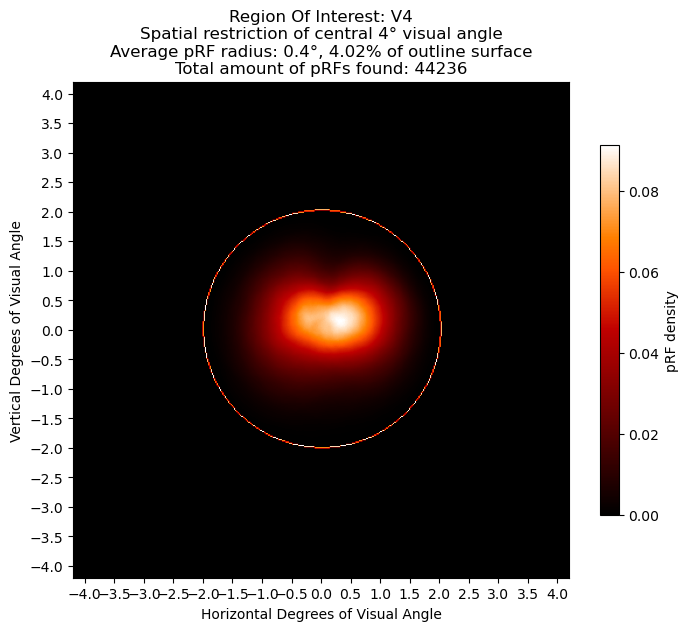

Runtime: 142.061 seconds
There were 2843 out of 3976 pRFs considered


In [193]:
# Working heatmap call script.
import random
import time

start = time.time()

heatmap, iter, end_premat, roi, prf_sizes, avg_surf, total_prfs = prf_heatmap('all', binary_masks=vismask_dict, prf_proc_dict=prf_dict,
                                                        mask_type='cut_gaussian', cmap='gist_heat', print_prog='y', 
                                                        roi='V4', sigma_min=0, sigma_max = 4.2, ecc_max = 2, subjects='all', 
                                                        outline_degs = 2, 
                                                        filter_dict = None, ecc_strict = 'y')

end = time.time()
print("Runtime:", np.round(end - start, 3), "seconds")

if end_premat is not True:
    print("There were", iter, "out of", np.sum(vismask_dict['subj01'][f'{roi}_mask']), "pRFs considered")

Subject: subj01, Voxel 1 out of 100 found
Subject: subj01, Voxel 2 out of 100 found
Subject: subj01, Voxel 3 out of 100 found
Subject: subj01, Voxel 4 out of 100 found
Subject: subj01, Voxel 5 out of 100 found
Subject: subj01, Voxel 6 out of 100 found
Subject: subj01, Voxel 7 out of 100 found
Subject: subj01, Voxel 8 out of 100 found
Subject: subj01, Voxel 9 out of 100 found
Subject: subj01, Voxel 10 out of 100 found
Subject: subj01, Voxel 11 out of 100 found
Subject: subj01, Voxel 12 out of 100 found
Subject: subj01, Voxel 13 out of 100 found
Subject: subj01, Voxel 14 out of 100 found
Subject: subj01, Voxel 15 out of 100 found
Subject: subj01, Voxel 16 out of 100 found
Subject: subj01, Voxel 17 out of 100 found
Subject: subj01, Voxel 18 out of 100 found
Subject: subj01, Voxel 19 out of 100 found
Subject: subj01, Voxel 20 out of 100 found
Subject: subj01, Voxel 21 out of 100 found
Subject: subj01, Voxel 22 out of 100 found
Subject: subj01, Voxel 23 out of 100 found
Subject: subj01, Vox

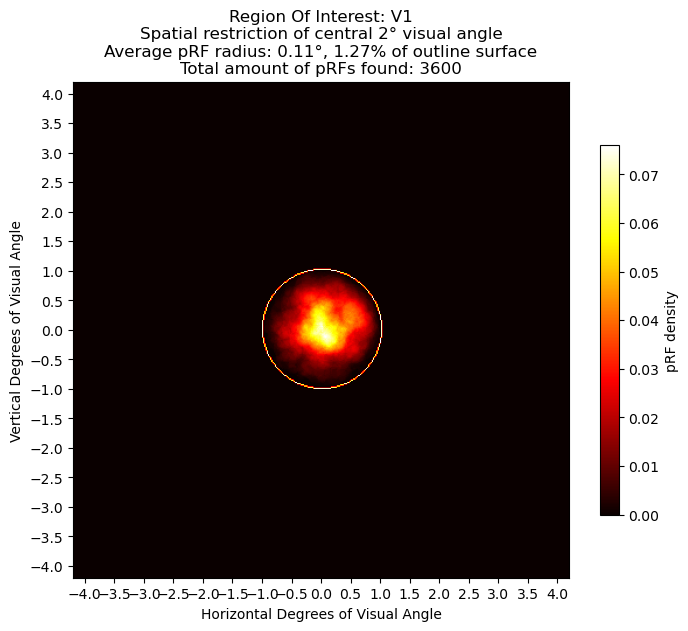

Runtime: 27.209 seconds
There were 466 out of 7887 pRFs considered


In [32]:
# Working heatmap call script.
from matplotlib.ticker import MultipleLocator

import time


start = time.time()

heatmap_full, iter, end_premat, roi, prf_sizes, avg_surf, total_prfs = prf_heatmap('all', binary_masks=vismask_dict, prf_proc_dict=prf_dict, 
                                                  mask_type='cut_gaussian', cmap='hot',print_prog='y', roi='V1', 
                                                  sigma_min=0, sigma_max=4.2, ecc_max = 1, subjects='all', 
                                                  outline_degs = 1, ecc_strict = 'y')

end = time.time()
print("Runtime:", np.round(end - start, 3), "seconds")

if end_premat is not True:
    print("There were", iter, "out of", np.sum(vismask_dict['subj01'][f'{roi}_mask']), "pRFs considered")

In [ ]:
# !{sys.executable} -m pip install nsdcode # This does not work, the ones below do
# !{sys.executable} -m pip install -r /home/rfpred/envs/rfenv/lib/python3.11/site-packages/nsdcode/requirements.txt
# !{sys.executable} -m pip install /home/rfpred/envs/rfenv/lib/python3.11/site-packages/nsdcode/.


In [ ]:

!{sys.executable} -m pip install numpy